In [70]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
%matplotlib inline

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.ndimage.filters import gaussian_filter
import statsmodels.api as sm
sns.set_palette(sns.color_palette('hot'))
sns.set_style('darkgrid')
sns.set_context('paper')

In [173]:
hour = 10

In [174]:
p_loc = '/Users/TRD/Research_Personal/Quant_Mo/data/pickled/'
l_loc = '/Users/TRD/Research_Personal/Quant_Mo/data/light_filt/'
long_loc = '/Users/TRD/Research_Personal/Quant_Mo/data/deep_look/'
file = p_loc+str(hour)+'all_data.pkl'
light_f = l_loc+str(hour)+'aw_light.npy'
# file = long_loc+str(hour)+'long_data.pkl'

In [175]:
print(file)
dp = pd.read_pickle(file)
light = gaussian_filter(np.load(light_f).astype('int'), sigma=7)

/Users/TRD/Research_Personal/Quant_Mo/data/pickled/10all_data.pkl


In [176]:
dp = dp[(np.abs(stats.zscore(dp)) < 2.8).all(axis=1)]
# dp = dp[ ((dp.raw_motion - dp.raw_motion.mean()) / dp.raw_motion.std()).abs() < 2.5 ]
# dp = dp[ ((dp.light - dp.light.mean()) / dp.raw_motion.std()).abs() < 2 ]
print(dp.shape)

(717, 6)


In [177]:
# Casts motion to int for the regression
def to_int(dp, column):
    if dp[column].dtype == 'float16':
        dp[column] = dp[column]*1e5
        dp[column] = dp[column].astype(np.int64)
    return dp[column]

                            OLS Regression Results                            
Dep. Variable:             raw_motion   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     801.4
Date:                Wed, 30 Jan 2019   Prob (F-statistic):          7.61e-119
Time:                        14:01:42   Log-Likelihood:                -3685.3
No. Observations:                 717   AIC:                             7375.
Df Residuals:                     715   BIC:                             7384.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.2369      4.913     10.428      0.0

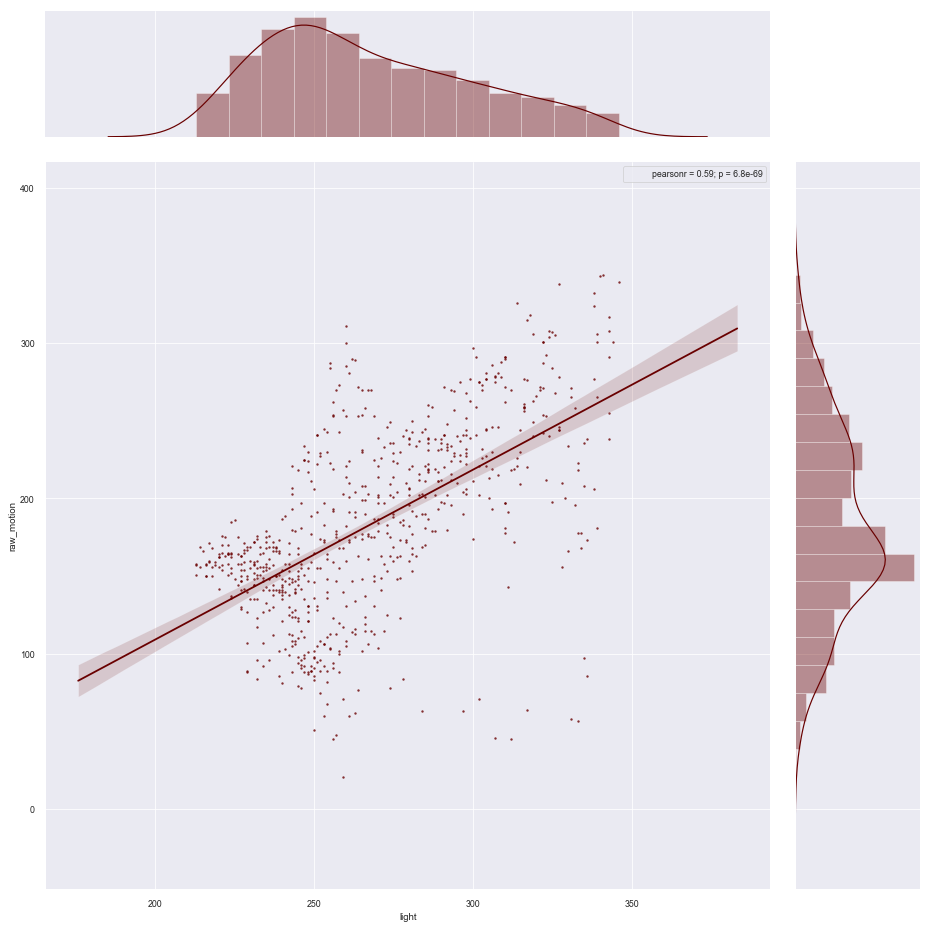

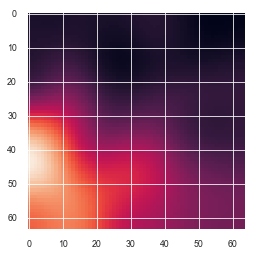

In [178]:
# This is a stats summary
dp['raw_motion'] = to_int(dp, 'raw_motion')
dp['motion_dx'] = to_int(dp, 'motion_dx')
dp['motion_dy'] = to_int(dp, 'motion_dy')


X = dp[["light_dx"]]
X = sm.add_constant(X)
Y = dp['raw_motion']
results = sm.OLS(Y, X).fit()
print(results.summary())

# This is the first regression curve
sns.jointplot('light','raw_motion', data=dp, marker = '.', kind='reg', size=13, stat_func=stats.pearsonr)
#dp['raw_motion'] = (dp['raw_motion'].values * 1e4).astype('int')
# sns.lmplot('light', 'raw_motion', data=dp, fit_reg = True, order=2, scatter=True, size=13)
plt.axis('on')
plt.show()

#This is the black and white image we're interested in
plt.imshow(light.astype(int))
plt.axis('on')
plt.show()

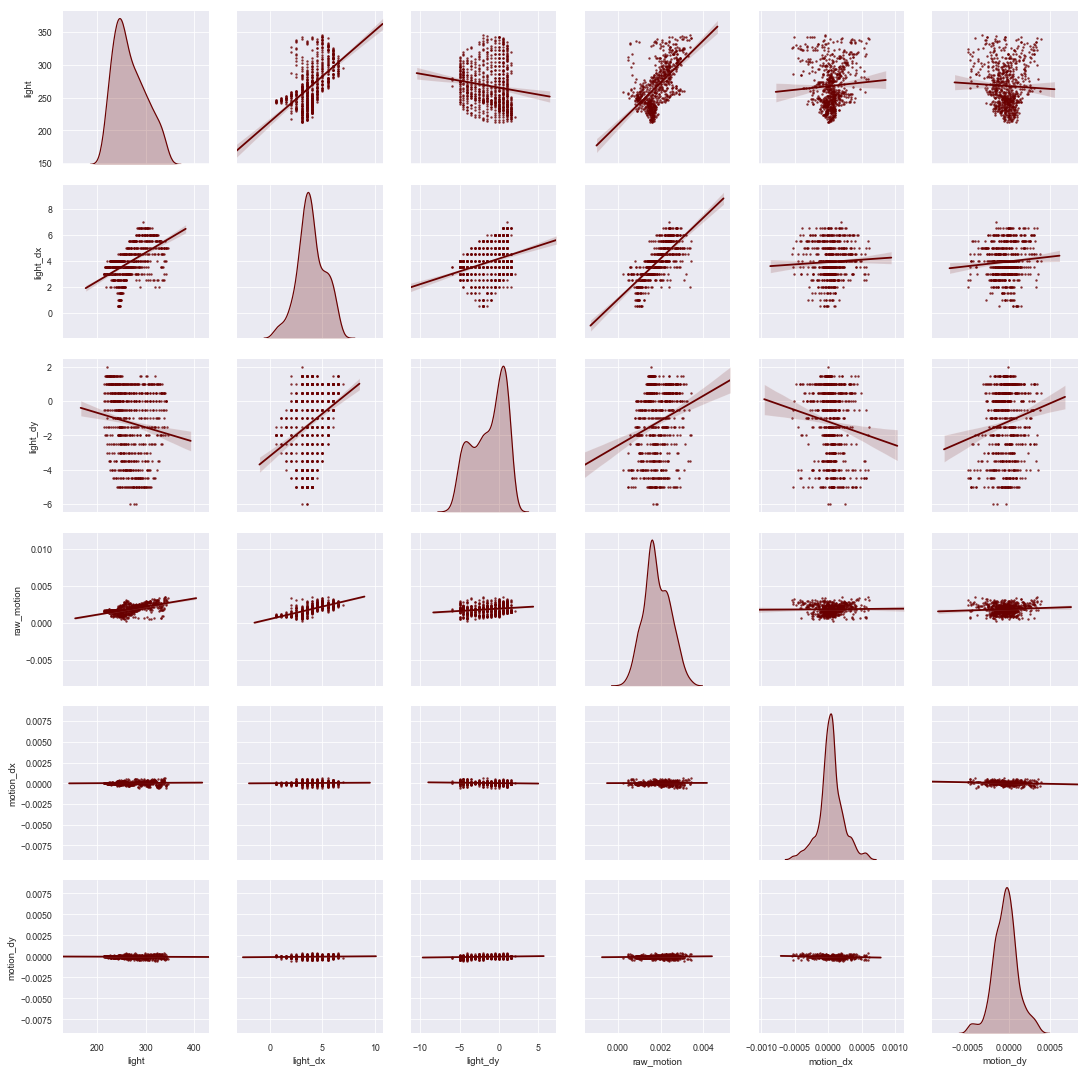

In [67]:
sns.pairplot(dp, diag_kind='kde', markers=".", kind='reg')

In [68]:
#import pandas_profiling
#pandas_profiling.ProfileReport(dp)

               light  light_dx  light_dy  raw_motion  motion_dx  motion_dy
light       1.000000  0.550160 -0.133914    0.591672   0.060229  -0.038977
light_dx    0.550160  1.000000  0.311416    0.726949   0.049705   0.082426
light_dy   -0.133914  0.311416  1.000000    0.213002  -0.119257   0.150732
raw_motion  0.591672  0.726949  0.213002    1.000000   0.019526   0.089587
motion_dx   0.060229  0.049705 -0.119257    0.019526   1.000000  -0.157862
motion_dy  -0.038977  0.082426  0.150732    0.089587  -0.157862   1.000000


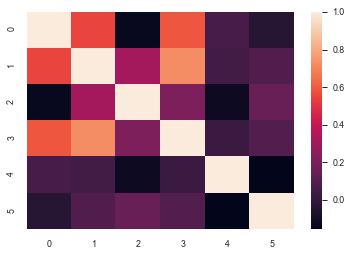

In [69]:
print(dp.corr())
sns.heatmap(dp.corr().values)

In [ ]:
light_arr = np.reshape(dp['light'].values, (64,64))
sns.heatmap(light_arr)

In [ ]:
import math
math.pow(784,0.5)